In [1]:
# Setting
## The path & packages


In [1]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path#
path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [2]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';',dtype={'default':float}, index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)


checking the data

In [3]:
df_train.head()

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0.0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,37831990.81,17111465.66,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0.0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4669178.63,927837.74,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0.0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,28101189.79,11116958.92,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0.0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8238473.86,7519183.22,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0.0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,35465651.58,8545183.94,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80


In [4]:
df_test.head(8)

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,728946.68,728946.68,209721.36,45390.50,...,NaN,NaN,64195.98,28659.19,5598.17,NaN,NaN,52632.64,-534.87,-5.457891e+04
C_896,GmbH,13127,87100,1992,181.0,GKV,708847.33,708847.33,738495.17,13017.29,...,NaN,442875.57,479144.25,452033.96,442835.62,NaN,NaN,-10575.21,-1295.42,-5.820000e-11
C_252,GmbH,14059,86101,1993,505.0,GKV,26025323.61,26015542.03,22022993.85,2086104.36,...,NaN,13733666.50,14504753.93,3441491.02,322075.13,3034766.29,NaN,2862349.65,-667342.46,-2.091456e+06
C_165,GmbH,10437,87100,1995,82.0,GKV,1105332.48,1105332.48,717405.05,88074.80,...,NaN,381990.95,371506.04,343269.12,256395.19,NaN,NaN,156251.71,-57344.11,-1.160000e-10
C_856,GmbH,14943,96090,2002,22.0,GKV,51995424.22,51979901.95,46420844.34,5956777.13,...,NaN,6828494.53,18909648.90,15619860.60,6720068.91,8847966.22,NaN,5696079.15,-1418555.39,-4.163971e+06
C_415,GmbH,10969,68321,2006,NaN,GKV,13597456.35,13597456.35,7667501.25,-109859.68,...,NaN,0.00,1273354.65,1277275.04,5848.43,136628.62,NaN,83600.84,1560281.10,-1.643803e+06
C_520,GmbH,10625,68100,2010,NaN,GKV,10365544.05,10365544.05,7931366.20,565338.94,...,NaN,8823433.07,7715921.82,7749440.79,6802934.01,855343.08,NaN,1051697.31,-366425.37,-5.398260e+03
C_127,GmbH,29308,87100,2007,NaN,GKV,10129943.12,10486827.90,5959584.15,435328.26,...,NaN,1990015.77,3451499.64,1352994.01,1349.09,986648.60,NaN,-56012.29,-533257.11,4.586848e+05


# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

### Transforming year_inc to age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

In [5]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
572,C_482,0.0,Freiberufler,61169,49310,0,NaN,GKV,635769.95,635769.95,...,37125.13,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,2021
477,C_597,1.0,Freiberufler,32457,71113,0,NaN,GKV,241456.04,216900.58,...,514698.88,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,2021
272,C_543,0.0,AG,86150,68101,1464,NaN,GKV,73165008.12,73165008.12,...,7797900.20,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,557
249,C_105,0.0,AG,76185,70101,1856,NaN,GKV,53372139.09,53110170.33,...,7522638.74,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,165
531,C_711,0.0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2713538.03,2713538.03,...,330130.46,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,164


As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [6]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
272,C_543,0.0,AG,86150,68101,1464,NaN,GKV,7.316501e+07,7.316501e+07,...,7.797900e+06,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,158.32
249,C_105,0.0,AG,76185,70101,1856,NaN,GKV,5.337214e+07,5.311017e+07,...,7.522639e+06,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,158.32
371,C_361,0.0,GmbH,21335,20520,1858,185.0,GKV,1.979305e+08,1.972723e+08,...,2.445527e+06,32809291.04,24618777.77,1012.13,24452421.93,NaN,11658956.29,-1.072492e+06,-1.088165e+07,158.32
572,C_482,0.0,Freiberufler,61169,49310,0,NaN,GKV,6.357699e+05,6.357699e+05,...,3.712513e+04,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,158.32
477,C_597,1.0,Freiberufler,32457,71113,0,NaN,GKV,2.414560e+05,2.169006e+05,...,5.146989e+05,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,158.32
283,C_519,0.0,GmbH,80807,18120,1862,NaN,GKV,1.560010e+06,4.462166e+06,...,3.912989e+05,1780853.40,507526.40,13989.13,NaN,NaN,-115009.30,-6.533309e+04,2.707314e+05,158.32
531,C_711,0.0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2.713538e+06,2.713538e+06,...,3.301305e+05,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,158.32
454,C_259,0.0,Freiberufler,44141,94110,1863,140.0,GKV,3.584665e+05,3.584665e+05,...,1.871424e+05,70476.90,61735.26,41618.21,NaN,NaN,22009.92,-1.400000e+05,1.307238e+05,158.00
165,C_347,0.0,GmbH,57072,25993,1866,116.0,GKV,2.645000e+05,2.645000e+05,...,1.834052e+04,186602.25,172230.65,1434.82,NaN,NaN,1484.67,4.500000e+01,0.000000e+00,155.00
445,C_019,0.0,AG,33689,70109,1870,107.0,GKV,2.432905e+06,2.432905e+06,...,-3.640000e-12,340903.37,340903.37,340903.37,NaN,NaN,1933900.10,0.000000e+00,-2.050780e+06,151.00


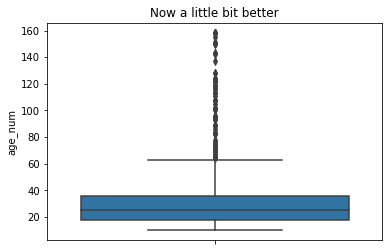

In [7]:
sns.boxplot(y=df_train["age_num"]).set_title("Now a little bit better");

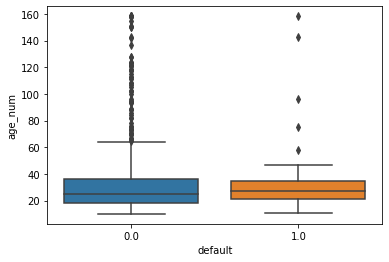

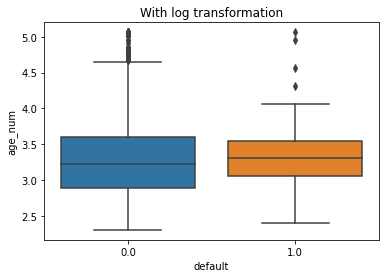

<Figure size 432x288 with 0 Axes>

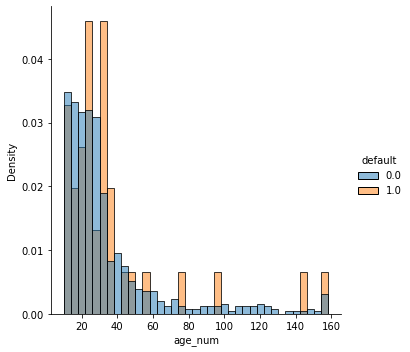

In [8]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

In [9]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(9.999, 13.0]","(13.0, 16.0]","(16.0, 20.0]","(20.0, 23.0]","(23.0, 25.0]","(25.0, 29.0]","(29.0, 32.0]","(32.0, 42.4]","(42.4, 66.0]","(66.0, 158.32]"
default,,,,,,,,,,
0.0,69,61,75,78,36,67,64,54,65,62
1.0,5,1,3,6,4,0,7,5,3,4


In [10]:
mdl = sm.Logit.from_formula('default ~ age_num + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.6596
Date:               2021-01-05 08:04 BIC:              304.6712
No. Observations:   669              Log-Likelihood:   -145.83 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.72592 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8782    0.2572  -11.1898  0.0000  -3.3823  -2.3740
age_num     0.0019    0.0054    0.3576  0.7206  -0.0087   0.0126



In [11]:
#Flave - habe age cat so transformiert, dass man sie unten in der regression benutzen kann
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 4, inclusive=True),
     df_train['age_num'].between(5, 9, inclusive=True),
     df_train['age_num'].between(10, 29, inclusive=True),
     df_train['age_num'].between(30, np.inf, inclusive=True)], 
    ["startup","young","intermediate","old"])

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,intermediate,old
default,,
0.0,386,245
1.0,19,19


In [12]:
# Mando
# df_train["age_cat"] = np.select([
#      df_train['age_num'].between(0, 19, inclusive=True),
#      df_train['age_num'].between(20, 29, inclusive=True),
#      df_train['age_num'].between(30, 39, inclusive=True),
#      df_train['age_num'].between(40, 49, inclusive=True),
#      df_train['age_num'].between(50, 59, inclusive=True),
#      df_train['age_num'].between(60, np.inf, inclusive=True)], 
#     ['10-19','20-29','30-39','40-49','50-59','>59'],)

# pd.crosstab(df_train["default"],df_train["age_cat"])

In [13]:
mdl = sm.Logit.from_formula('default ~ age_cat + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.006   
Dependent Variable: default          AIC:              293.9493
Date:               2021-01-05 08:04 BIC:              302.9609
No. Observations:   669              Log-Likelihood:   -144.97 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.17575 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      -3.0114   0.2350 -12.8148 0.0000 -3.4720 -2.5508
age_cat[T.old]  0.4546   0.3346   1.3587 0.1742 -0.2012  1.1103



In [14]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  id
---------------------------------------------------
         0.0  1.0  N_False  N_True  N  N_Perc
id                                           
C_995  100.0  0.0        1       0  1    0.15
C_994  100.0  0.0        1       0  1    0.15
C_992  100.0  0.0        1       0  1    0.15
C_990  100.0  0.0        1       0  1    0.15
C_986  100.0  0.0        1       0  1    0.15
...      ...  ...      ...     ... ..     ...
C_006  100.0  0.0        1       0  1    0.15
C_004  100.0  0.0        1       0  1    0.15
C_002  100.0  0.0        1       0  1    0.15
C_001  100.0  0.0        1       0  1    0.15
C_000  100.0  0.0        1       0  1    0.15

[669 rows x 6 columns]

Variable:  legal_form
---------------------------------------------------
                            0.0    1.0  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.2

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [15]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl', 'age_cat']

In [16]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing',
 'age_num']

## Missing values

Overview of missing values in the data

In [17]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          669
bonds_payables_st          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
total_assets                 1
earn_from_op                 1
annual_profit                1
sales                        1
current_assets               1
cf_operating                 1
cf_investment                1
cf_financing                 1
year_inc                     0
sector                       0
zip_code                     0
type_pl                      0
legal_fo

In [18]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

## Univariate Analysis

### Univariate Logit Regressions
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us. Also we do these regressions before data cleansing, which is another important thing to consider. The aim of this is only to see if their is some clear evidence for significant features in the data in the first place.

In [19]:
col_list = df_train.columns[2:]
col_list
dictionary_logit = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        print(model.summary2()) #comment that out if you don't want to see the regression summary
        pvalue = model.pvalues[1]
        dictionary_logit[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: default          AIC:              294.4736
Date:               2021-01-05 08:04 BIC:              303.4851
No. Observations:   669              Log-Likelihood:   -145.24 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.25258 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const       -3.1658    0.3671  -8.6249  0.0000  -3.8852  -2.4464
zip_code     0.0000    0.0000   1.1393  0.2546  -0.0000   0.0000

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: 

                         Results: Logit
Model:                Logit            Pseudo R-squared: 0.004   
Dependent Variable:   default          AIC:              276.0375
Date:                 2021-01-05 08:04 BIC:              284.8545
No. Observations:     607              Log-Likelihood:   -136.02 
Df Model:             1                LL-Null:          -136.61 
Df Residuals:         605              LLR p-value:      0.27642 
Converged:            1.0000           Scale:            1.0000  
No. Iterations:       8.0000                                     
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const            -2.7128   0.1780 -15.2400 0.0000 -3.0617 -2.3639
oth_interest_exp -0.0000   0.0000  -0.7494 0.4536 -0.0000  0.0000

                           Results: Logit
Model:                 Logit             Pseudo R-squared: 

                           Results: Logit
Model:                 Logit             Pseudo R-squared:  0.001   
Dependent Variable:    default           AIC:               178.8387
Date:                  2021-01-05 08:04  BIC:               186.3565
No. Observations:      317               Log-Likelihood:    -87.419 
Df Model:              1                 LL-Null:           -87.488 
Df Residuals:          315               LLR p-value:       0.71124 
Converged:             1.0000            Scale:             1.0000  
No. Iterations:        6.0000                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
const               -2.4872   0.2243 -11.0902 0.0000 -2.9268 -2.0477
bank_liabilities_st  0.0000   0.0000   0.3837 0.7012 -0.0000  0.0000

                          Results: Logit
Model:             

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.005   
Dependent Variable: default          AIC:              294.1402
Date:               2021-01-05 08:04 BIC:              303.1488
No. Observations:   668              Log-Likelihood:   -145.07 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.21683 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -2.7851   0.1674 -16.6414 0.0000 -3.1131 -2.4571
cf_operating   -0.0000   0.0000  -1.1682 0.2427 -0.0000  0.0000

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: defau

In [20]:
pd.DataFrame.from_dict(dictionary_logit,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")

,P-Value,NAs
cash,0.036941,32
year_inc,0.055606,0
total_equity,0.109640,21
gross_profit,0.153112,7
cf_operating,0.242710,1
bank_liabilities_lt,0.245019,545
zip_code,0.254582,0
total_liabilities_lt,0.259686,0
cf_investment,0.328421,1
total_assets,0.366245,1


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

### Mann-Whitney U Test
Also we perform a Mann-Whitney U Test for all variables to see if there is a difference in those variables between default and non default firms.

In [21]:
col_list

dictionary_mannu = dict()

for i in range(0,len(col_list)):
    try: 
        group_default = df_train[df_train["default"]==1][col_list[i]]
        group_non_default = df_train[df_train["default"]==0][col_list[i]]
        test_stat, pvalue = sci.stats.mannwhitneyu(group_default,group_non_default)
        dictionary_mannu[col_list[i]] = test_stat, pvalue, df_train[col_list[i]].isnull().sum()
    except:
        continue

#sns.boxplot(x="default",y=np.log(df_train[col_list[6]]),data=df_train)

In [22]:
pd.DataFrame.from_dict(dictionary_mannu,orient="index",
                       columns=['Test statistic','P-Value','NAs']).sort_values(by="P-Value")

,Test statistic,P-Value,NAs
cash,7716.0,0.000111,32
trade_receivables_lt,8339.0,0.000805,645
trade_payables_lt,8430.0,0.001051,665
bonds_payables_st,8471.0,0.001183,669
bonds_payables_lt,8471.0,0.001183,669
monetary_current_assets,8712.0,0.002315,0
bonds_payables_mt,8855.0,0.003383,664
result_from_ord_bus,8910.0,0.003900,1
total_result,8993.0,0.004814,0
trade_payables_mt,9057.0,0.005645,648


# Variables

In [23]:
# # drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 
# --> das ist gar nicht gut, ich brauche hier einen loop der entweder alle comps mit mehr als x Spalten NaNs dropt
# oder loop der alle corr Spalten checkt und wenn NaN dann drop comp

# Approach Mando
looking and adjusting each of our variables of interest, which are:

- Cash
- Total equity
- Current assets
- Current liabilities
- Operating Cashflow
- Sales
- Total assets
- Annual profit

In [66]:
df = df_train[["default","cash","gross_profit","earn_from_op","total_equity","current_assets",
               "total_liabilities_st","total_liabilities_mt","total_liabilities_lt",
               "cf_operating","total_assets","annual_profit"]]
df

,default,cash,gross_profit,earn_from_op,total_equity,current_assets,total_liabilities_st,total_liabilities_mt,total_liabilities_lt,cf_operating,total_assets,annual_profit
0,0.0,10297047.50,3.859361e+07,6536077.55,3.224471e+07,37831990.81,7.356606e+06,3.752194e+06,2.556459e+05,6.986094e+06,4.365848e+07,6.522577e+06
1,0.0,926383.75,1.539841e+06,38140.91,4.508026e+06,4669178.63,7.034964e+06,0.000000e+00,0.000000e+00,-4.343980e+06,1.156799e+07,1.116985e+06
2,0.0,9146283.79,1.500839e+07,89799.80,5.164048e+04,28101189.79,8.443592e+06,1.401615e+04,0.000000e+00,9.548544e+06,5.511145e+07,-1.400000e-09
3,0.0,6890565.23,3.293227e+07,584315.02,1.182011e+07,8238473.86,2.579710e+06,8.160722e+04,1.319019e+05,1.715799e+06,1.994848e+07,5.946089e+05
4,0.0,5036615.09,1.254550e+08,54033808.08,4.547445e+08,35465651.58,3.475160e+08,1.647352e+08,9.222217e+07,1.301809e+08,1.089218e+09,2.840600e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
664,0.0,31000.00,1.420400e+07,374000.00,2.882000e+06,8482000.00,1.015100e+07,0.000000e+00,2.773000e+06,2.684073e+05,1.580600e+07,-4.400000e+04
665,0.0,252537.31,2.312606e+06,244694.05,4.735249e+05,1106105.07,9.117692e+05,0.000000e+00,0.000000e+00,-4.333359e+05,1.385294e+06,2.155249e+05
666,0.0,573037.66,4.307021e+07,12876951.53,-1.120000e-08,6307456.86,1.504382e+08,0.000000e+00,2.124201e+08,1.407505e+06,3.628583e+08,4.678002e+06
667,0.0,5652.17,1.934094e+05,9855.87,-1.460000e-11,70507.91,1.146466e+05,0.000000e+00,0.000000e+00,2.530806e+04,1.146466e+05,7.309040e+03


## 1. Single independent variables

1. Ebit

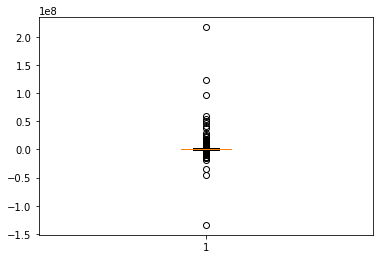

In [125]:
#df_train['ebit'] = df_train['earn_from_op']
df_train['ebit'] = sci.stats.mstats.winsorize(df_train['earn_from_op'], limits =[0.0, 0.0])
plt.boxplot(df_train.ebit)
plt.show()

2. Profit

In [126]:
df_train['profit'] = df_train['gross_profit'].replace(np.nan, np.quantile(df_train['gross_profit'].dropna(),.5))
df_train['profit'] = (df_train['profit'])
print(df_train['profit'].isnull().sum())
print(df_train['profit'].describe())
print(df_train['profit'].value_counts())

0
count    6.680000e+02
mean     1.746451e+07
std      6.718432e+07
min      2.454000e+02
25%      5.988899e+05
50%      2.079737e+06
75%      1.023961e+07
max      9.353868e+08
Name: profit, dtype: float64
2.079737e+06    6
3.179544e+07    1
1.992372e+05    1
1.764491e+06    1
8.547527e+05    1
               ..
1.740950e+07    1
2.633705e+06    1
2.970949e+05    1
1.269732e+07    1
6.143953e+05    1
Name: profit, Length: 663, dtype: int64


3. Cash

In [127]:
df_train['cash'] = df_train['cash'].replace(np.nan, np.quantile(df_train['cash'].dropna(),.5))
#df_train['cash'] = sci.stats.mstats.winsorize(df_train['cash'], limits =[0.0, 0.005]) #entweder winsorize oder log (log denke besser)
df_train['cash'] = (df_train['cash'])
print(df_train['cash'].isnull().sum())
print(df_train['cash'].describe())
print(df_train['cash'].value_counts())

0
count    6.680000e+02
mean     2.257458e+06
std      7.809472e+06
min      3.090000e+00
25%      2.031953e+04
50%      1.387784e+05
75%      9.784640e+05
max      7.242854e+07
Name: cash, dtype: float64
138778.38      32
72428540.01     4
154972.27       1
207.80          1
17562888.95     1
               ..
14077.10        1
47322295.51     1
109157.10       1
69127.76        1
35.00           1
Name: cash, Length: 634, dtype: int64


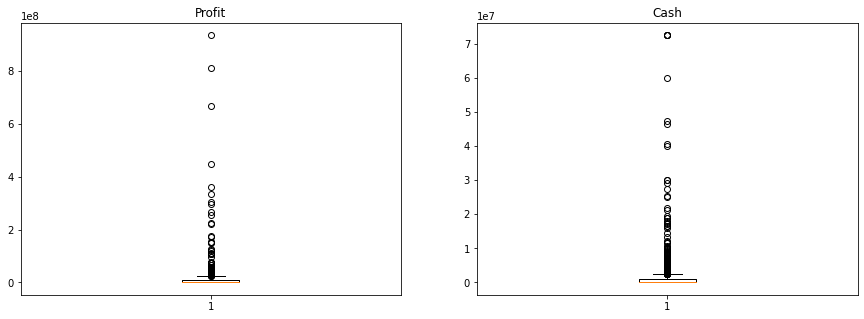

In [128]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].boxplot(df_train['profit'])
ax[0].set_title('Profit')
ax[1].boxplot(df_train['cash'])
ax[1].set_title('Cash')
plt.show()

## 2. Predict NaN for total equity
Source: https://towardsdatascience.com/predict-missing-values-in-the-dataset-897912a54b7b


Check for correlation to get relevant variables for regression

In [74]:
print('corr total eqity x total result: ' + str(df_train['total_equity'].corr(df_train['total_result'])))
print('corr total eqity x total assets: ' + str(df_train['total_equity'].corr(df_train['total_assets'])))
print('corr total eqity x operating cash flow: ' + str(df_train['total_equity'].corr(df_train['cf_operating'])))


corr total eqity x total result: 0.8677428854384167
corr total eqity x total assets: 0.7973909460204517
corr total eqity x operating cash flow: 0.8165188337701584


Split training and prediction dataset

In [75]:
cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

Train model to fit dataset and predict missing values from column total equity and replace them

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 804154.57039481  826770.37433689  750108.44000769 2034060.76386614
  906958.71620785  757800.98860179  694739.75133315  777633.44217635
 1031927.82907442  707250.99306169  798206.66922867  753555.95951813
  938481.58223852  838818.88678532  728338.08877872  658229.22939661
  757045.94589861 3707034.78681171  430054.79880165  809294.10299163]


Replace the missing values with predicted values

In [77]:
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred
print(df_train['total_equity'].isnull().sum())
print(df_train['total_equity'].describe())
print(df_train['total_equity'].value_counts()) 

0
count    6.680000e+02
mean     2.257491e+07
std      1.437662e+08
min     -1.120000e-08
25%      9.821184e+04
50%      6.330711e+05
75%      4.242629e+06
max      2.883814e+09
Name: total_equity, dtype: float64
 0.000000e+00    21
 2.500000e+04     5
 3.640000e-12     5
 1.460000e-11     3
-3.640000e-12     3
                 ..
-5.820000e-11     1
 2.439935e+06     1
 9.888687e+06     1
 5.076543e+05     1
 1.367994e+07     1
Name: total_equity, Length: 631, dtype: int64


## 3. Financial ratios

1. working capital ratio = current assets/current liabilities (liquidity ratios measuring a companies ability to meet its short term dept obligations)

In [130]:
#create a column with total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']

df_train['wc_ratio'] = df_train['current_assets']/df_train['total_liabilities_st']
#df_train['wc_ratio'] = sci.stats.mstats.winsorize(df_train['wc_ratio'], limits =[0, 0.02])
print(df_train.wc_ratio)
print(df_train.wc_ratio.describe())

0      5.142587
1      0.663710
2      3.328108
3      3.193566
4      0.102055
         ...   
664    0.835583
665    1.213142
666    0.041927
667    0.615002
668    1.006126
Name: wc_ratio, Length: 668, dtype: float64
count    668.000000
mean       2.468297
std        6.831628
min        0.000933
25%        0.785477
50%        1.177708
75%        1.929122
max       86.138329
Name: wc_ratio, dtype: float64


2. operating profit ratio = operating cf/sales

In [136]:
cf_pos = np.where(df_train['cf_operating'] > 1, df_train['cf_operating'], 0)
cf_neg = np.where(df_train['cf_operating'] < -1, df_train['cf_operating'], 0)
df_train['ocf_ratio'] = df_train['cf_operating']/df_train['sales']
# winsorize ocf
#df_train['ocf_ratio'] = sci.stats.mstats.winsorize(df_train['ocf_ratio'], limits =[0.01, 0.02])
print(df_train.ocf_ratio)
print(df_train.ocf_ratio.describe())

0      0.065368
1     -3.116492
2      2.471134
3      0.391307
4      1.178664
         ...   
664    0.009571
665   -0.083731
666    0.032679
667    0.137266
668    0.094305
Name: ocf_ratio, Length: 668, dtype: float64
count    667.000000
mean       0.727125
std       18.570528
min     -233.666159
25%        0.002927
50%        0.049404
75%        0.147929
max      373.414286
Name: ocf_ratio, dtype: float64


Next we use two solvency ratio (measure a companies ability to meet its long term dept obligations) that we will weight as one to circumvent overfitting

3. equity ratio = tot equity/total assets

In [132]:
df_train['equity_ratio'] = np.where(df_train['total_equity'] > 1, df_train['total_equity']/df_train['total_assets'], 0)
#df_train['equity_ratio'] = sci.stats.mstats.winsorize(df_train['equity_ratio'], limits =[0.0, 0.02])
print(df_train.equity_ratio)
print(df_train.equity_ratio.describe())
print(df_train.equity_ratio.value_counts()) #46 nulls

0      0.738567
1      0.389698
2      0.000937
3      0.592532
4      0.417496
         ...   
664    0.182336
665    0.341823
666    0.000000
667    0.000000
668    0.040729
Name: equity_ratio, Length: 668, dtype: float64
count    668.000000
mean       0.387833
std        0.579788
min        0.000000
25%        0.106484
50%        0.284663
75%        0.506833
max        9.221039
Name: equity_ratio, dtype: float64
0.000000    46
0.738567     1
0.427731     1
0.169249     1
0.662966     1
            ..
0.215929     1
1.062351     1
0.281173     1
0.794892     1
0.282468     1
Name: equity_ratio, Length: 623, dtype: int64


4. debt to equity ratio = total dept/total equity

count      668.000000
mean        44.738385
std        481.189680
min          0.000000
25%          0.591623
50%          1.908121
75%          5.358456
max      11312.751676
Name: debt_to_equity, dtype: float64
0        0.352444
1        1.560542
2      163.778649
3        0.236311
4        1.329259
          ...    
664      4.484386
665      1.925494
666      0.000000
667      0.000000
668     23.541597
Name: debt_to_equity, Length: 668, dtype: float64
0.000000      46
109.681371     1
0.585548       1
1.448680       1
34.560992      1
              ..
0.270086       1
4.970072       1
163.778649     1
2.417631       1
87.495855      1
Name: debt_to_equity, Length: 623, dtype: int64


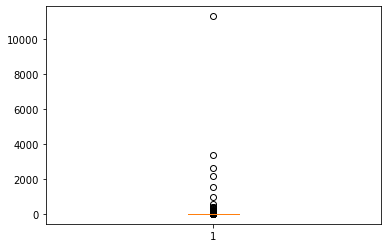

In [133]:
df_train['debt_to_equity'] = np.where(df_train['total_equity'] > 1, df_train['total_liabilities']/df_train['total_equity'], 0)
#df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])#
#df_train['debt_to_equity'] = np.where(df_train['debt_to_equity'] > 0, np.log(df_train['debt_to_equity']), 0)

print(df_train.debt_to_equity.describe())
print(df_train.debt_to_equity)
print(df_train.debt_to_equity.value_counts()) #46 nulls
plt.boxplot(df_train.debt_to_equity)
plt.show()

5. Return on Assets

In [134]:
df_train['roa'] = df_train['annual_profit']/df_train['total_assets']
#df_train['debt_to_equity'] = sci.stats.mstats.winsorize(df_train['debt_to_equity'], limits =[0.0, 0.02])
#df_train['debt_to_equity'] = np.where(df_train['debt_to_equity'] > 0, np.log(df_train['debt_to_equity']), 0)
    
print(df_train.roa.describe())
print(df_train.roa)
print(df_train.roa.value_counts()) #46 nulls

count    6.680000e+02
mean     5.750400e-02
std      1.393243e-01
min     -7.285700e-01
25%      9.968144e-17
50%      2.750187e-02
75%      8.735437e-02
max      8.854164e-01
Name: roa, dtype: float64
0      1.494000e-01
1      9.655827e-02
2     -2.540307e-17
3      2.980723e-02
4      2.607926e-02
           ...     
664   -2.783753e-03
665    1.555806e-01
666    1.289209e-02
667    6.375280e-02
668    1.757980e-01
Name: roa, Length: 668, dtype: float64
 0.000000    25
 0.010619     1
 0.267353     1
 0.162280     1
 0.097041     1
             ..
-0.039522     1
 0.041535     1
 0.027676     1
 0.014480     1
 0.026929     1
Name: roa, Length: 644, dtype: int64


Boxplots for ratios

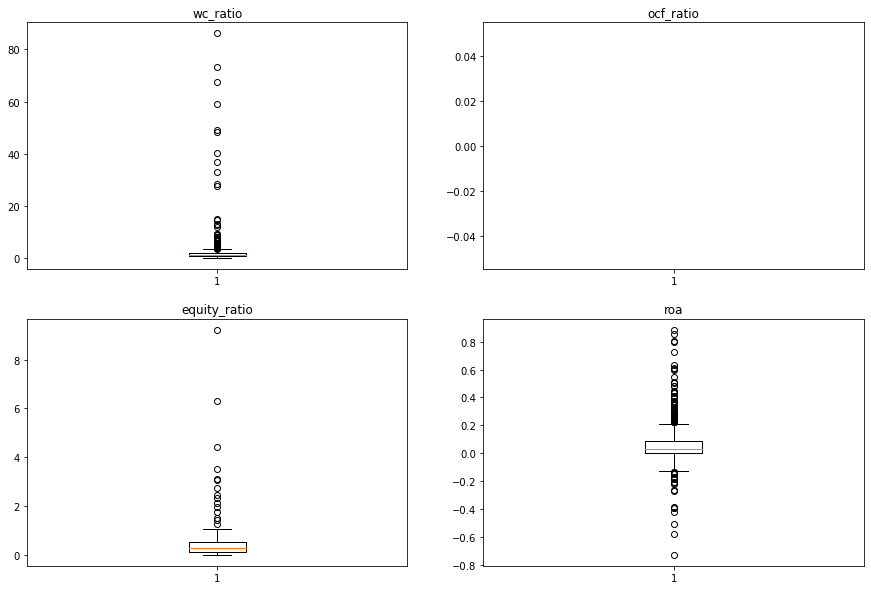

In [135]:
f, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].boxplot(df_train['wc_ratio'])
ax[0,0].set_title('wc_ratio')
ax[0,1].boxplot(df_train['ocf_ratio'])
ax[0,1].set_title('ocf_ratio')
ax[1,0].boxplot(df_train['equity_ratio'])
ax[1,0].set_title('equity_ratio')
ax[1,1].boxplot(df_train['roa'])
ax[1,1].set_title('roa')
plt.show()

Create a dataframe with single ratios and financial ratios and a heatmap to check for correlation between ratios

           ebit        profit         cash   wc_ratio  ocf_ratio  \
0  6.536078e+06  3.859361e+07  10297047.50   5.142587   0.065368   
1  3.814091e+04  1.539841e+06    926383.75   0.663710  -3.116492   
2  8.979980e+04  1.500839e+07   9146283.79   3.328108   2.471134   
3  5.843150e+05  3.293227e+07   6890565.23   3.193566   0.391307   
4  5.403381e+07  1.254550e+08   5036615.09   0.102055   1.178664   
5  2.238291e+04  4.847705e+04     75679.79  14.987767   0.398513   
6  4.729300e+07  1.076359e+08  11542490.91   0.834046   0.265676   
7 -1.340470e+08  4.233500e+07  21696000.00   1.483001   2.061521   
8  3.785872e+06  6.110980e+06    322573.88   0.394765   0.044533   
9  1.704879e+05  3.147030e+05     35726.57   0.711538   1.406577   

   equity_ratio  debt_to_equity           roa  
0      0.738567        0.352444  1.494000e-01  
1      0.389698        1.560542  9.655827e-02  
2      0.000937      163.778649 -2.540307e-17  
3      0.592532        0.236311  2.980723e-02  
4      0.41

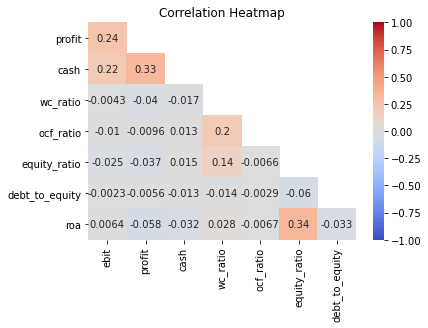

In [137]:
col = ['ebit', 'profit', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa']
data = df_train[col]
print(data.head(10))
print(data.info())

df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
heatmap.set_title('Correlation Heatmap')
plt.show()

# Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset. Also we ran univariate logisitc regression to determine if the ratio is significant in a univariate sense (is not a K.O. criteria).

Our variables of interest are, so the variables we will put in our logistic regression, are :

- Ebit
- Profit
- Cash
- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt to Equity Ratio


In [138]:
col_list = ["default","age_num","ebit","profit","cash","wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","roa"]
df_train[col_list]

,default,age_num,ebit,profit,cash,wc_ratio,ocf_ratio,equity_ratio,debt_to_equity,roa
0,0.0,121.0,6536077.55,3.859361e+07,10297047.50,5.142587,0.065368,0.738567,0.352444,1.494000e-01
1,0.0,45.0,38140.91,1.539841e+06,926383.75,0.663710,-3.116492,0.389698,1.560542,9.655827e-02
2,0.0,59.0,89799.80,1.500839e+07,9146283.79,3.328108,2.471134,0.000937,163.778649,-2.540307e-17
3,0.0,49.0,584315.02,3.293227e+07,6890565.23,3.193566,0.391307,0.592532,0.236311,2.980723e-02
4,0.0,113.0,54033808.08,1.254550e+08,5036615.09,0.102055,1.178664,0.417496,1.329259,2.607926e-02
...,...,...,...,...,...,...,...,...,...,...
664,0.0,44.0,374000.00,1.420400e+07,31000.00,0.835583,0.009571,0.182336,4.484386,-2.783753e-03
665,0.0,21.0,244694.05,2.312606e+06,252537.31,1.213142,-0.083731,0.341823,1.925494,1.555806e-01
666,0.0,21.0,12876951.53,4.307021e+07,573037.66,0.041927,0.032679,0.000000,0.000000,1.289209e-02
667,0.0,14.0,9855.87,1.934094e+05,5652.17,0.615002,0.137266,0.000000,0.000000,6.375280e-02


## EBIT

KeyboardInterrupt: 

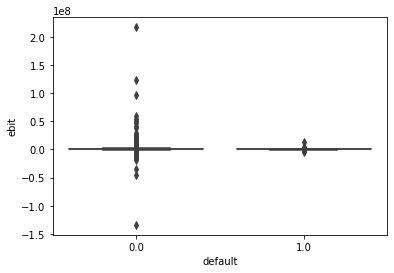

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

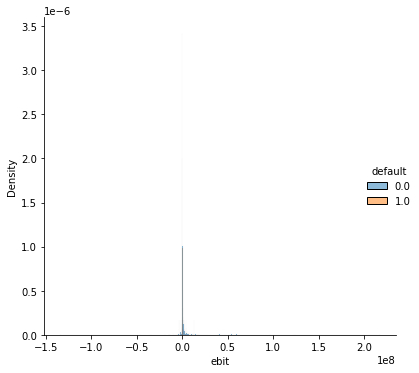

In [159]:
sns.boxplot(y="ebit",x="default",data=df_train);
plt.figure()
#sns.boxplot(y=np.log(df_train["ebit"]),x="default",
            #data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ebit",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ebit + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Profit

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.016   
Dependent Variable: default          AIC:              291.0112
Date:               2021-01-05 09:07 BIC:              300.0198
No. Observations:   668              Log-Likelihood:   -143.51 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.030977
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     9.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.6244    0.1884  -13.9277  0.0000  -2.9938  -2.2551
profit     -0.0000    0.0000   -1.4137  0.1575  -0.0000   0.0000



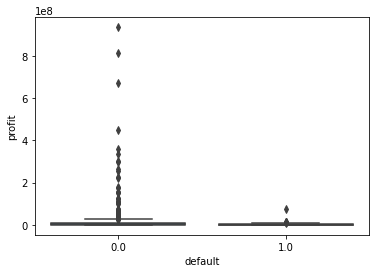

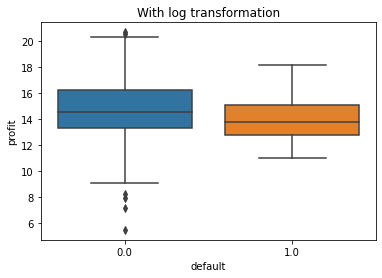

<Figure size 432x288 with 0 Axes>

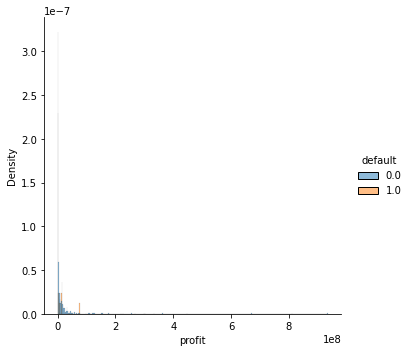

In [160]:
sns.boxplot(y="profit",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["profit"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="profit",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ profit + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Cash

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.055     
Dependent Variable: default          AIC:              279.5840  
Date:               2021-01-05 09:07 BIC:              288.5925  
No. Observations:   668              Log-Likelihood:   -137.79   
Df Model:           1                LL-Null:          -145.83   
Df Residuals:       666              LLR p-value:      6.0673e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     11.0000                                      
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept    -2.4195    0.1879  -12.8741  0.0000  -2.7878  -2.0511
cash         -0.0000    0.0000   -2.0794  0.0376  -0.0000  -0.0000



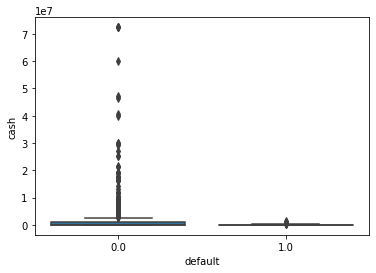

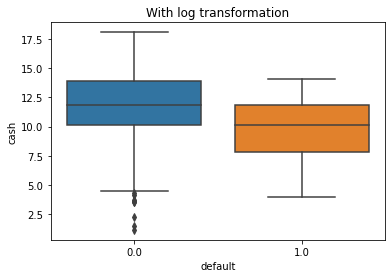

<Figure size 432x288 with 0 Axes>

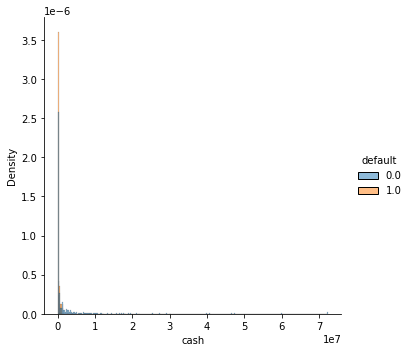

In [161]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="cash",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ cash + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Working Capital Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.017   
Dependent Variable: default          AIC:              290.8446
Date:               2021-01-05 09:07 BIC:              299.8532
No. Observations:   668              Log-Likelihood:   -143.42 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.028117
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     9.0000                                     
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept   -2.4324    0.2585  -9.4113  0.0000  -2.9389  -1.9258
wc_ratio    -0.2527    0.1591  -1.5888  0.1121  -0.5645   0.0590



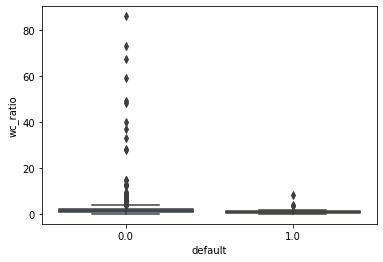

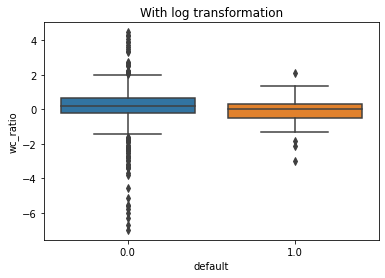

<Figure size 432x288 with 0 Axes>

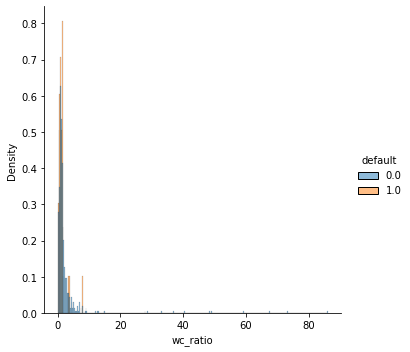

In [162]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ wc_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Operating Cash Flow Ratio

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.5175
Date:               2021-01-05 09:07 BIC:              304.5231
No. Observations:   667              Log-Likelihood:   -145.76 
Df Model:           1                LL-Null:          -145.77 
Df Residuals:       665              LLR p-value:      0.86080 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8057    0.1671  -16.7933  0.0000  -3.1332  -2.4783
ocf_ratio  -0.0017    0.0100   -0.1703  0.8648  -0.0213   0.0179



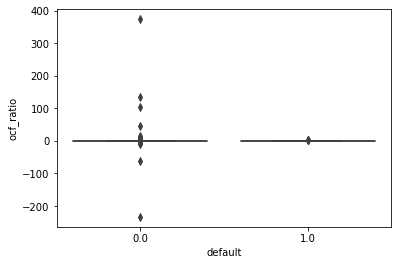

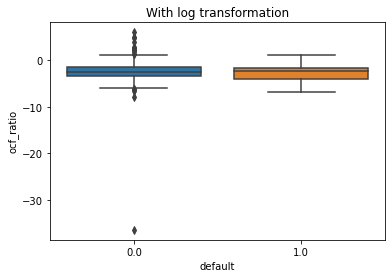

In [163]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
#plt.figure()
#sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ocf_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Equity Ratio 

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.003   
Dependent Variable: default          AIC:              294.8737
Date:               2021-01-05 09:07 BIC:              303.8822
No. Observations:   668              Log-Likelihood:   -145.44 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.37355 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
Intercept      -2.8899   0.1898 -15.2284 0.0000 -3.2619 -2.5180
equity_ratio    0.1930   0.1927   1.0016 0.3165 -0.1847  0.5708



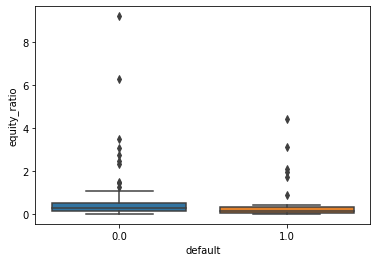

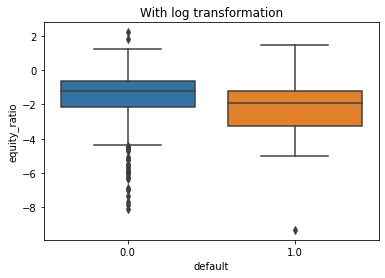

<Figure size 432x288 with 0 Axes>

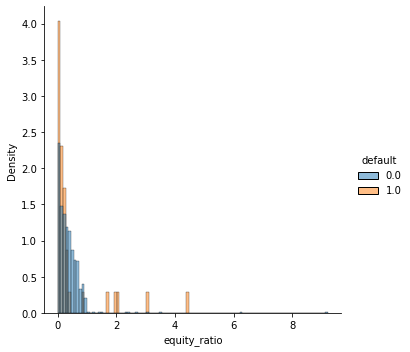

In [164]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ equity_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [165]:
pd.crosstab(df_train["default"],df_train["equity_ratio"]==0) #see that 6 defaulted with an equity ratio of 0

equity_ratio,False,True
default,,
0.0,590,40
1.0,32,6


## Debt to Equity Ratio

KeyboardInterrupt: 

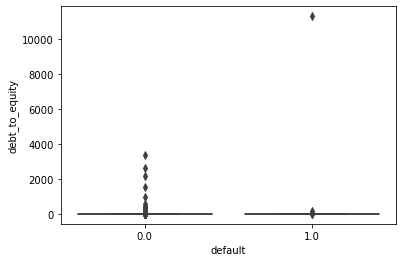

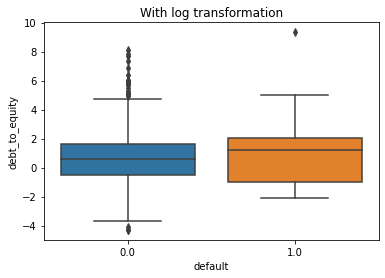

<Figure size 432x288 with 0 Axes>

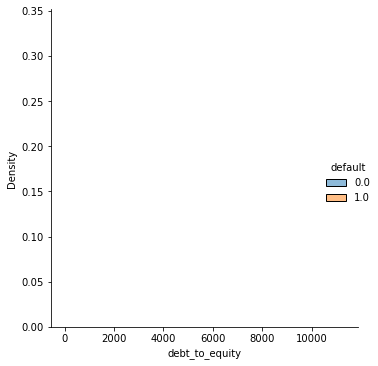

In [166]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="debt_to_equity",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ debt_to_equity + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

# Our Logit Regression

In [167]:
# 'ebit', 'profit', 'cash', 'wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity', 'roa'
mdl1 = sm.Logit.from_formula('default ~  age_num + cash + profit + ebit + wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + roa + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.102     
Dependent Variable: default          AIC:              281.8185  
Date:               2021-01-05 09:09 BIC:              326.8464  
No. Observations:   667              Log-Likelihood:   -130.91   
Df Model:           9                LL-Null:          -145.77   
Df Residuals:       657              LLR p-value:      0.00048766
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     11.0000                                      
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -2.3063   0.3341 -6.9019 0.0000 -2.9612 -1.6513
age_num            0.0034   0.0055  0.6199 0.5354 -0.0074  0.0142
cash              -0.0000   0.0000 -1.9018 0.0572 -0.0000  0.0000
profit            -0.0000   0.0000 -

In [168]:
y = df_train["default"]
X = df_train[['age_num','cash','profit', 'ebit', 'wc_ratio', 'ocf_ratio', 'equity_ratio','debt_to_equity', 'roa']]
X = X.fillna(0)
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

Optimization terminated successfully.
         Current function value: 0.196101
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.102     
Dependent Variable: default          AIC:              281.9904  
Date:               2021-01-05 09:09 BIC:              327.0333  
No. Observations:   668              Log-Likelihood:   -131.00   
Df Model:           9                LL-Null:          -145.83   
Df Residuals:       658              LLR p-value:      0.00049819
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     11.0000                                      
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.3124   0.3338 -6.9280 0.0000 -2.9665 -1.6582
age_num            0.0035   0.0055  0.6323 0.5272 -0.0073  0.0142
cash              -0.0000   0.0000 -1.8992 0.0575 -0.0000  0.0000
profit            -0.0000   0.0000 -0.5393 0.5897 -0.0000  0.0000
ebit              -0.0000   0.0000 -0.1926 0.8473 -0.0000  0.0000
wc_ratio          -0.1861   0.1348 -1.3802 0.1675 -0.4504  0.0782
ocf_ratio          0.0057   0.0396  0.1437 0.8858 -0.0718  0.0832
equity_ratio       0.4052   0.2077  1.9504 0.0511 -0.0020  0.8123
debt_to_equity     0.0004   0.0002  1.7042 0.0883 -0.0001  0.0009
roa               -2.6434   1.3646 -1.9372 0.0527 -5.3179  0.0310
=================================================================

"""

In [169]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

,default,estimated PD in %
566,1.0,87.08
409,0.0,30.78
285,0.0,30.66
313,1.0,23.32
416,0.0,22.24
...,...,...
440,0.0,0.00
432,0.0,0.00
410,0.0,0.00
394,0.0,0.00


In [170]:
s["estimated PD in %"].describe()

count    668.000000
mean       5.700943
std        5.305743
min        0.000000
25%        2.082500
50%        5.830000
75%        8.010000
max       87.080000
Name: estimated PD in %, dtype: float64

In [171]:
s[s["default"] == 1]

,default,estimated PD in %
32,1.0,4.83
43,1.0,7.76
69,1.0,8.16
104,1.0,13.87
114,1.0,4.22
120,1.0,7.11
128,1.0,8.80
139,1.0,21.19
150,1.0,18.99
198,1.0,5.84


In [172]:
# Splitting data into training and testing sets.
train_features, test_features, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)
 
# The splited Logit Model
mdl2split = sm.Logit(train_labels,train_features).fit()
mdl2split.summary2()

# Predict the test data
predictions_split = mdl2split.predict(test_features)
# Predict the training data
predictions_split_train = mdl2split.predict(train_features)

# Calculate the absolute errors
errors = abs(predictions_split - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Optimization terminated successfully.
         Current function value: 0.190320
         Iterations 11
Mean Absolute Error: 0.11 .


Out sample: 
AUC (LY):   0.6617063492063493
GINI (LY):  0.3234126984126986


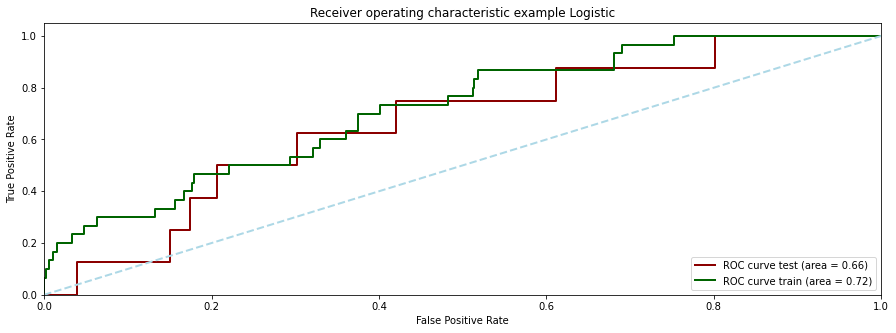

In [173]:
#AUC & Gini Graph + Calculations of splitted logit

fpr_split, tpr_split, thresholds_split = metrics.roc_curve(test_labels, predictions_split)
auc_split = metrics.auc(fpr_split, tpr_split) 

#Predict the in sample (train) data for comparision
fpr_split_train, tpr_split_train, thresholds_split_train = metrics.roc_curve(train_labels, predictions_split_train)
auc_split_train = metrics.auc(fpr_split_train, tpr_split_train)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_split, tpr_split, color='darkred',
         lw=lw, label='ROC curve test (area = %0.2f)' % auc_split)
axes = plt.plot(fpr_split_train, tpr_split_train, color='darkgreen',
         lw=lw, label='ROC curve train (area = %0.2f)' % auc_split_train)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("Out sample: ")
print('AUC (LY):  ',auc_split)
print('GINI (LY): ', 2*auc_split -1)

In sample: 
AUC L1:   0.714452798663325
GINI L1:  0.42890559732665
AUC L2:   0.7145363408521304
GINI L2:  0.4290726817042607
Splitted Logit Regression
AUC L2:   0.6617063492063493
GINI L2:  0.3234126984126986
Out sample: 
AUC Test Sample:   0.6617063492063493
GINI Test Sample:  0.3234126984126986


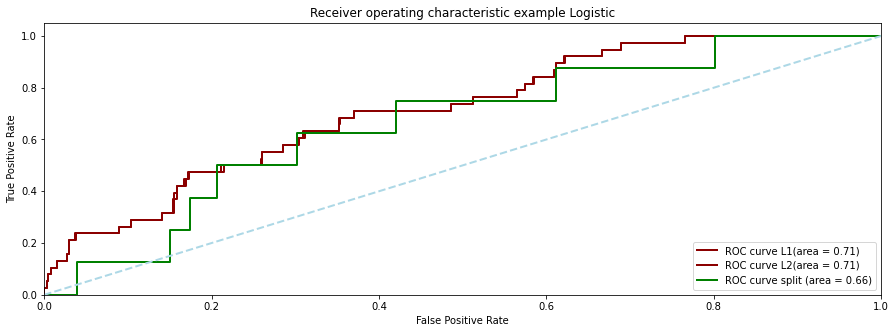

In [174]:
#AUC & Gini Graph + Calculations of old logit regression (red) splitted logit regression (green)
predictions_L1 = mdl1.predict(X)
predictions_L2 = mdl2.predict(X)
#AUC & Gini Graph + Calculations
fpr_L1, tpr_L1, thresholds_L1 = metrics.roc_curve(df_train['default'], predictions_L1)
auc_L1 = metrics.auc(fpr_L1, tpr_L1)

fpr_L2, tpr_L2, thresholds_L2 = metrics.roc_curve(df_train['default'], predictions_L2)
auc_L2 = metrics.auc(fpr_L2, tpr_L2)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr_L1, tpr_L1, color='darkred',
         lw=lw, label='ROC curve L1(area = %0.2f)' % auc_L1)
axes = plt.plot(fpr_L2, tpr_L2, color='darkred',
         lw=lw, label='ROC curve L2(area = %0.2f)' % auc_L2)
axes = plt.plot(fpr_split, tpr_split, color='green',
         lw=lw, label='ROC curve split (area = %0.2f)' % auc_split)
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example Logistic')
plt.legend(loc="lower right")

print("In sample: ")
print('AUC L1:  ',auc_L1)
print('GINI L1: ', 2*auc_L1 -1)
print('AUC L2:  ',auc_L2)
print('GINI L2: ', 2*auc_L2 -1)
print('Splitted Logit Regression')
print('AUC L2:  ',auc_split)
print('GINI L2: ', 2*auc_split -1)
print("Out sample: ")
print('AUC Test Sample:  ',auc_split)
print('GINI Test Sample: ', 2*auc_split -1)
# Overfitting wenn man alle Daten nimmt (trotzdem noch nicht gut RF hat AUC von 97 mit splitting). Bei Test Data eher schlechte Performance.

# Random Forest Approach

In [154]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, 
                            criterion='gini',
                            max_depth=None,
                            min_samples_split = 5,
                            min_samples_leaf = 3,
                            max_features='auto',
                            bootstrap=True,
                            oob_score=True,
                            random_state = 0,
                            verbose=0,
                            n_jobs= 2 ,
                            class_weight = 'balanced_subsample')


# Train the model on training data
rf.fit(train_features, train_labels)
rf.score(train_features, train_labels)

0.99812734082397

In [155]:
# Use the forest's predict method on the test data
predictions_rf = rf.predict(test_features)
predictions_rf_insample = rf.predict(train_features)

predictions_prob = rf.predict_proba(test_features)[:, 1]
predictions_prob_rf_insample = rf.predict_proba(train_features)[:,1]
# Calculate the absolute errors
errors = abs(predictions_rf - test_labels)


# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '.')

Mean Absolute Error: 0.07 .


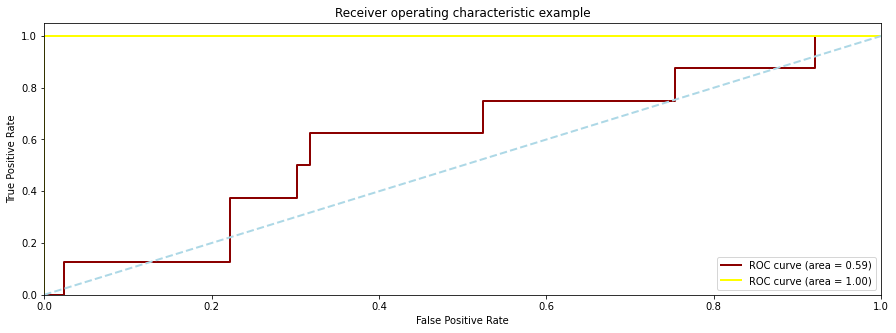

Random Forest Approach
In sample:
AUC :   1.0
GINI:  1.0
Out sample: 
AUC :   0.5892857142857144
GINI:  0.17857142857142883


In [157]:
predicitons_rf_prob = rf.predict_proba(test_features)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicitons_rf_prob)
auc = metrics.auc(fpr, tpr)

#In Sample measurements
fpr_rf_is, tpr_rf_is, thresholds_rf_is = metrics.roc_curve(train_labels, predictions_prob_rf_insample)
auc_rf_is = metrics.auc(fpr_rf_is, tpr_rf_is)

fig, axes = plt.subplots(figsize=(15,5))
lw = 2
axes = plt.plot(fpr, tpr, color='darkred',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
axes = plt.plot(fpr_rf_is, tpr_rf_is, color='yellow',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_rf_is)        
axes = plt.plot([0, 1], [0, 1], color='lightblue', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

print("Random Forest Approach")
print("In sample:")
print('AUC :  ',auc_rf_is)
print('GINI: ', 2*auc_rf_is -1)
print("Out sample: ")
print('AUC :  ',auc)
print('GINI: ', 2*auc -1)